<br>
<center style="color:#180090; font-weight: bold; font-size: 3em">Esercitazione 9</center><br>
<center style="color:#555555; font-size: 2em; margin-bottom: 0.2cm;">Francesco Righini</center>
<center style="color:#555555; font-size: 1.5em">(931984)</center>

In [1]:
# importazione librerie
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import networkx as nx
params = {'legend.fontsize': 'x-large', 'figure.figsize': (10, 6), 'axes.labelsize': 'x-large', 'axes.titlesize':'xx-large', 'xtick.labelsize':'x-large', 'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

<div style="color:#180090; font-size: 0.9cm; padding-top: 1em; font-weight:bold;">Esercizio 1</div>

<div style="color:#333333; font-size: 0.43cm; padding: 1em; background-color:#F5F5F5">
Risolvere il problema del commesso viaggiatore con l'uso di un algoritmo genetico
</div>

<div style="font-size: 0.43cm;">
    
La popolazione è formata da $P$ individui, ognuno dei quali è caratterizzato da un "DNA" che contiene in ordine le $N$ città visitate. Inizialmente la popolazione viene creata assegnando DNA casuali agli individui.

Ad ogni passaggio generazionale avvengono $K$ accoppiamenti.
Ad ogni accoppiamento vengono selezionati due individui e creato un nuovo individuo che ne rimpiazza uno nella metà popolazione meno performante.
    
In questo algoritmo ci sono due parametri fondamentali: l'elitarietà $e$ e la mutabilità $m$.

L'elitarietà ($e=1$ : democrazia, $e>1$ : meritocrazia) governa la probabilità di essere scelti come "genitori". Maggiore è $e$, più è probabile che vengano scelti genitori più performanti a scapito degli altri.
Un'elitarietà eccessiva porta a fossilizzare la situazione iniziale creando tante copie dei migliori all'inizio. Contrariamente, un'elitarietà troppo bassa ($e\approx1$) non favorisce la formazione di un gruppo di popolazione performante che, con accoppiamenti delle proprie parti, potrebbe portare ai migliori risultati.
    
L'accoppiamento avviene in questo modo:
scelti i genitori (li chiamerò padre e madre), si copia il DNA del padre troncandolo ad un certo punto scelto casualmente. Questo nuovo DNA sarà quindi più corto e mancherà di alcune città. Le città mancanti nel DNA si aggiungono in coda seguendo l'ordine con cui appaiono nel DNA materno. In questo modo si giunge ad avere un DNA della stessa lunghezza di quello dei genitori e contenente tutte le città.
    
Una volta creato questo nuovo DNA, prima di essere introdotto nella popolazione può subire delle piccole mutazioni. Con probabilità $m$ il nuovo individuo andràincontro ad una delle seguenti mutazioni:
- permutazione della posizione di due città;
- shift di un gruppo di città contigue di un certo numero di posizioni;
- permutazione di gruppi di città contigue;
- inversione dell'ordine di un gruppo di città contigue.
    
Dopo aver eventualmente subito una mutazione, il nuovo DNA è pronto per essere un nuovo individuo. In questo algoritmo c'è un cambio generazionale continuo: il nuovo individuo sostituisce a caso uno degli individui della metà meno performante della popolazione. In questo modo, per "morire" bisogna essere poco performanti. Gli individui più performanti possono morire solo con il progresso dell'intera popolazione: se ci saranno tanti "giovani e forti", i vecchi forti finiranno piano piano nella parte meno performante e quindi saranno esposti alla sostituzione.
    
</div>

<div style="font-size: 0.43cm;">
In questo caso il numero di città è $N=32$ e ho scelto di avere una popolazione con $P=400$ individui. Ad ogni generazione avvengono $K=100$ accoppiamenti, quindi circa un quarto della popolazione viene sostituita (circa, perché se un individuo appena nato è poco performante tale da stare nella seconda metà della popolazione, potrebbe essere sostituito da un suo "coetaneo" creato appena dopo).

I parametri di evoluzione sono $e=1.5$, $m=0.15$.

Si sono simulate $1000$ generazioni.
</div>

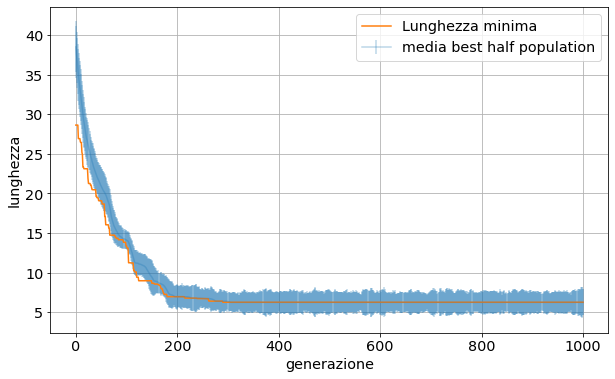

In [2]:
best, media, sigma = np.loadtxt("results/1_1.dat", usecols=(0,1,2), unpack='true')
x = np.arange(len(media))
plt.errorbar(x,media,yerr=sigma,label=r"media best half population",alpha=0.3)
plt.plot(x,best,label="Lunghezza minima")
plt.xlabel('generazione')
plt.ylabel('lunghezza')
plt.grid(True)
plt.legend()
plt.show()

<div style="font-size: 0.43cm;">
    
Dopo $400$ generazioni si è raggiunta la lunghezza minima che è rimasta tale fino alla fine.
La media della metà popolazione più performante è inizialmente lontana dal migliore, per poi avvicinarsi sempre di più fino praticamente a coincidere.
    
</div>

<div style="font-size: 0.43cm;">
    
In questo caso la mappa era una sequenza di $N=32$ città disposte su una circonferenza. L'esempio è banale, poiché la soluzione consiste nel percorrere in ordine lungo la circonferenza le città.
    
</div>

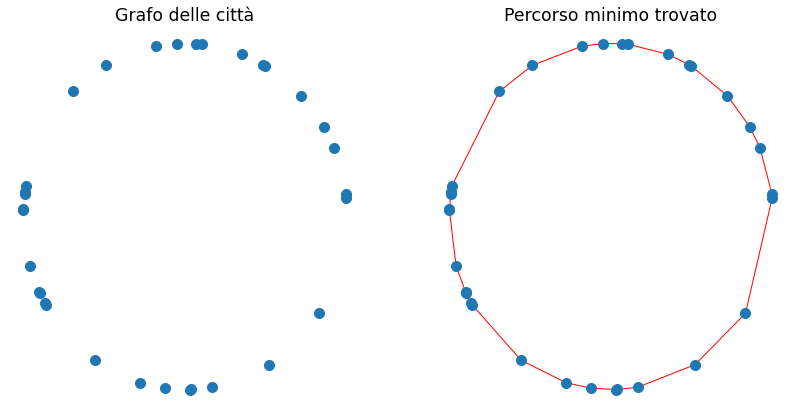

<Figure size 360x360 with 0 Axes>

In [3]:
fig, axs = plt.subplots(1,2,figsize=(14,7))


file = open ( 'results/map_1.dat' , 'r')
mappa = []
mappa = [ line.split() for line in file]

G = nx.Graph()

for city in mappa:
    G.add_node(city[0], pos=[float(city[1]),float(city[2])])

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[0], pos=pos, node_size=100)
axs.flat[0].set(title = "Grafo delle città");



file = open ( 'results/path_1.dat' , 'r')
path = []
path = [ line.split() for line in file]

G.add_edges_from(path)

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[1], pos=pos, node_size=100, edge_color = 'red')
axs.flat[1].set(title = "Percorso minimo trovato");

plt.show()

<div style="font-size: 0.43cm;">
    
L'algoritmo è riuscito a trovare la soluzione ottima.
Dato che questo problema generico è NP-Hard, non è in generale possibile sapere "facilmente" se la soluzione trovata è veramente quella ottima. In questo caso ne siamo certi perché è una situazione molto particolare.
    
</div>

<div style="font-size: 0.43cm;">
    
Con gli stessi parametri di simulazione si testa l'algoritmo su una mappa più generica: $32$ città disposte uniformemente su un'area quadrata.
    
</div>

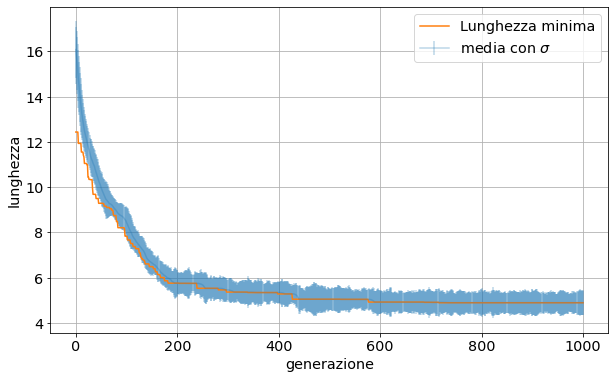

In [4]:
best, media, sigma = np.loadtxt("results/1_2.dat", usecols=(0,1,2), unpack='true')
x = np.arange(len(media))
plt.errorbar(x,media,yerr=sigma,label=r"media con $\sigma$",alpha=0.3)
plt.plot(x,best,label="Lunghezza minima")
plt.xlabel('generazione')
plt.ylabel('lunghezza')
plt.grid(True)
plt.legend()
plt.show()

<div style="font-size: 0.43cm;">
    
In questo caso l'algoritmo genetico impiega un po' più di generazioni (circa $600$) per trovare la soluzione migliore (non necessariamente ottima, migliore!).
    
</div>

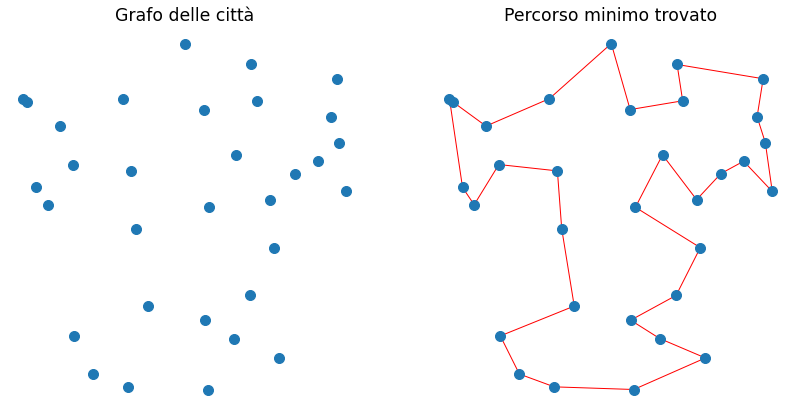

<Figure size 360x360 with 0 Axes>

In [5]:
fig, axs = plt.subplots(1,2,figsize=(14,7))


file = open ( 'results/map_2.dat' , 'r')
mappa = []
mappa = [ line.split() for line in file]

G = nx.Graph()

for city in mappa:
    G.add_node(city[0], pos=[float(city[1]),float(city[2])])

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[0], pos=pos, node_size=100)
axs.flat[0].set(title = "Grafo delle città");



file = open ( 'results/path_2.dat' , 'r')
path = []
path = [ line.split() for line in file]

G.add_edges_from(path)

pos = nx.get_node_attributes(G, 'pos')
plt.figure(3,figsize=(5,5)) 
nx.draw(G, ax=axs.flat[1], pos=pos, node_size=100, edge_color = 'red')
axs.flat[1].set(title = "Percorso minimo trovato");

plt.show()

<div style="font-size: 0.43cm;">
La soluzione è una candidata soluzione ottima: non ci sono evidenze di non ottimalità (come ad esempio incroci).
</div>